In [1]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib.gridspec as gridspec 
from scipy import stats
import seaborn as sns
sns.set_style('whitegrid')

import warnings
warnings.simplefilter(action='ignore')

from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score, GridSearchCV, KFold, RandomizedSearchCV, train_test_split
import math
import sklearn.model_selection as ms
import sklearn.metrics as sklm

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session


In [2]:
data = pd.read_csv('alonhadat-CLEAN2.csv', encoding='utf-8')

In [3]:
data.drop(data[data['area'].isnull()].index, inplace=True)

In [4]:
data.drop(data[data['area']==0].index, inplace=True)

In [5]:
#calculate price per m2
data['price_per_m2'] = data['price']*1000/data['area']

In [6]:
data.head()

,area,direction,dining_room,road_width,kitchen,house_type,land_use_rights,rooftop,width,storey,car_parking,length,bedroom,road,ward,district,price,price_per_m2
0,40.0,Null,NaN,7.0,NaN,Nhà trong hẻm,Sổ hồng/ Sổ đỏ,NaN,NaN,4,NaN,NaN,3.0,lê trọng tấn,la khê,hà đông,5.95,148.75
1,40.0,Null,NaN,11.0,NaN,Nhà mặt tiền,NaN,NaN,NaN,5,NaN,NaN,3.0,ao sen,mộ lao,hà đông,10.45,261.25
2,40.0,Null,NaN,5.0,NaN,Nhà trong hẻm,Sổ hồng/ Sổ đỏ,NaN,NaN,4,NaN,NaN,4.0,xa la,kiến hưng,hà đông,4.90,122.50
3,50.0,Null,NaN,11.0,NaN,"Biệt thự, nhà liền kề",Sổ hồng/ Sổ đỏ,NaN,NaN,6,NaN,NaN,4.0,tố hữu,la khê,hà đông,7.45,149.00
4,60.0,Null,NaN,17.0,NaN,Nhà mặt tiền,Sổ hồng/ Sổ đỏ,NaN,NaN,5,NaN,NaN,4.0,phan đình phùng,yết kiêu,hà đông,12.30,205.00


In [7]:
#handle outliers for price_per_m2
data.drop(data[data['price_per_m2']>1500].index, inplace=True)

<AxesSubplot:>

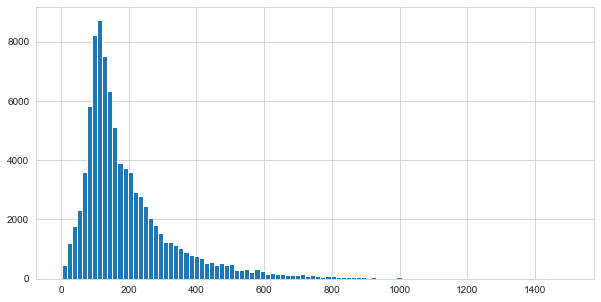

In [8]:
#plot histogram for price_per_m2
data['price_per_m2'].hist(bins=100, figsize=(10,5))

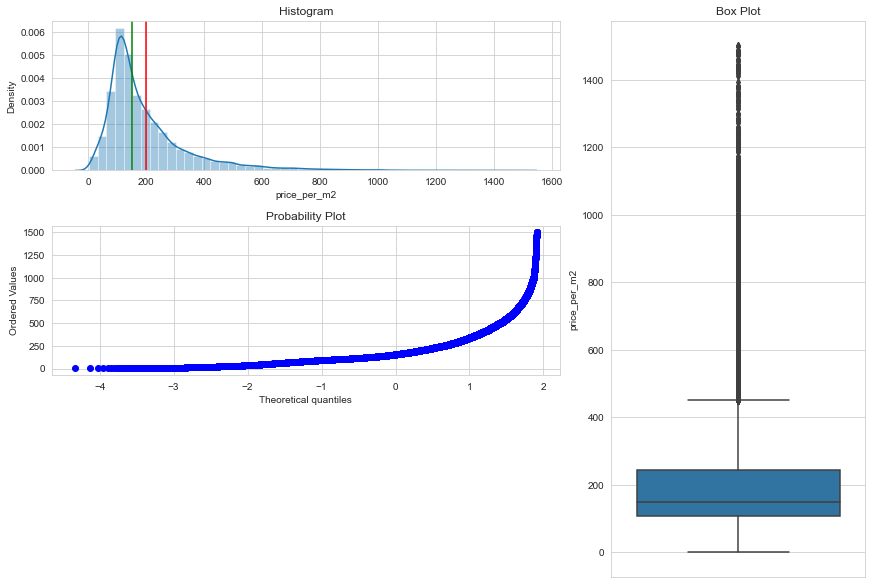

In [9]:
def three_chart_plot(df, feature):
    fig = plt.figure(constrained_layout = True, figsize = (12, 8))
    grid = gridspec.GridSpec(ncols = 3, nrows = 3, figure = fig)
    
    ax1 = fig.add_subplot(grid[0, :2])
    ax1.set_title('Histogram')
    
    sns.distplot(df.loc[:, feature], norm_hist = True,ax = ax1)
    plt.axvline(x = df[feature].mean(), c = 'red')
    plt.axvline(x = df[feature].median(), c = 'green')
    
    ax2 = fig.add_subplot(grid[1, :2])
    ax2.set_title('QQ_plot')
    stats.probplot(df.loc[:,feature], plot = ax2)

    ## Customizing the Box Plot. 
    ax3 = fig.add_subplot(grid[:, 2])
    ## Set title. 
    ax3.set_title('Box Plot')
    sns.boxplot(y=df[feature], ax = ax3 )
    
three_chart_plot(data, 'price_per_m2')


In [10]:
from scipy.stats import skew
print("Skewness of the SalesPrice is", data['price_per_m2'].skew())

Skewness of the SalesPrice is 2.440040247354665


As the mean of the feature is greater than the median which is greater than the mode and the line is flat towards the right in the histogram, the given feature is Positively Skewed. Most of the houses were sold less than the average price.



In [11]:
data.replace('Null', np.nan, inplace=True)
data.replace('NULL', np.nan, inplace=True)


<AxesSubplot:>

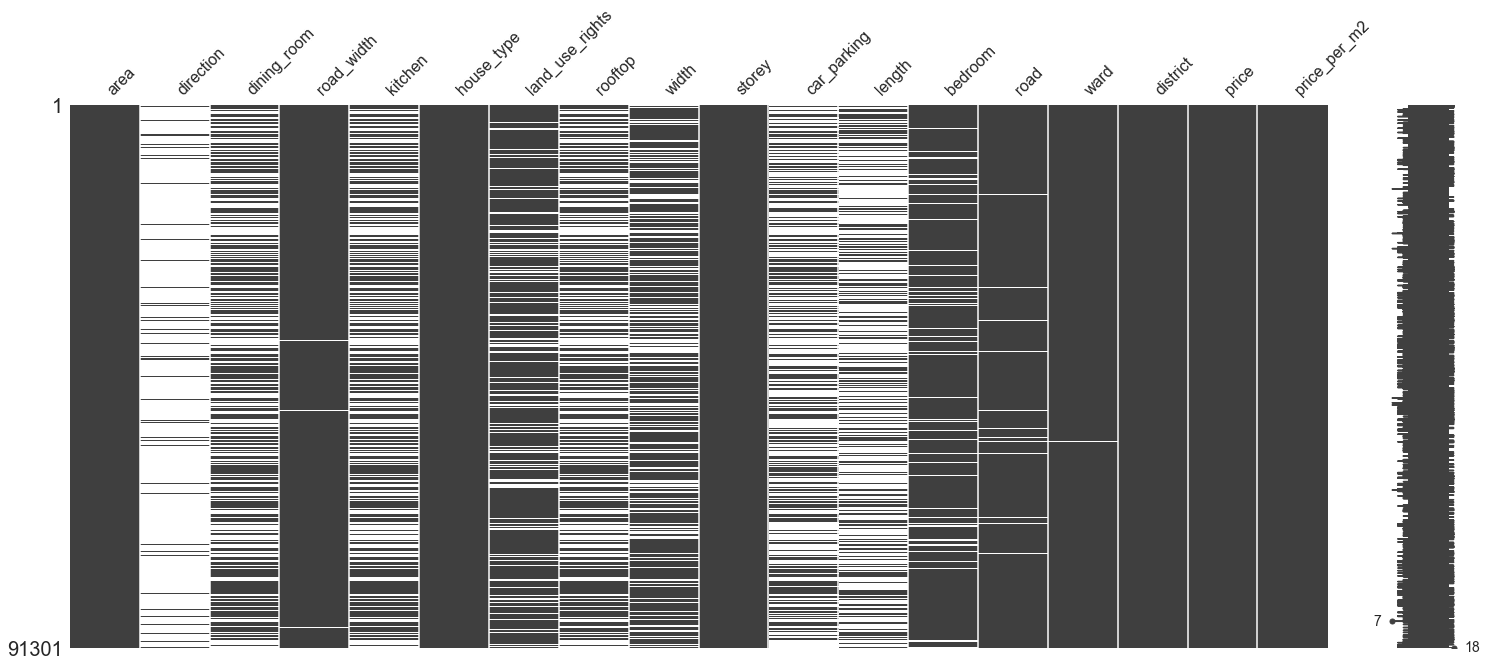

In [92]:
import missingno as msno
%matplotlib inline
msno.matrix(data)

Drop columns where price is null

In [13]:
data.drop(data[data['price'].isnull()].index, inplace=True)

In [14]:
def null_table(data):
    """
    A function which returns the number and percentage of null values in the given dataset.
    """
    indices = data.isnull().sum().index
    values = data.isnull().sum().values
    percentages = []
    for i in indices:
        percentages.append((data[i].isnull().sum() / data[i].shape[0]) * 100)
    d = {'Columns' : indices, 'Count of Null Values' : values, 'Approximate Percentage of Null Values' : percentages}
    # data = dict(zip(indices, percentages))
    null_frame = pd.DataFrame(data = d)
    return null_frame
null_frame_train = null_table(data)
null_frame_train.sort_values(by = 'Approximate Percentage of Null Values').tail(20)


,Columns,Count of Null Values,Approximate Percentage of Null Values
0,area,0,0.000000
15,district,0,0.000000
9,storey,0,0.000000
16,price,0,0.000000
5,house_type,0,0.000000
17,price_per_m2,0,0.000000
14,ward,386,0.422777
3,road_width,569,0.623213
13,road,2194,2.403040
12,bedroom,8408,9.209100


In [15]:
data.reset_index(drop=True, inplace=True)

In [16]:
#split to train and test df 
indices = np.random.permutation(data.index)

# Calculate the split index based on the ratios
split_idx = int(len(data) * 0.7)

# Split the dataframe into train and test
train = data.iloc[indices[:split_idx]]
test = data.iloc[indices[split_idx:]]



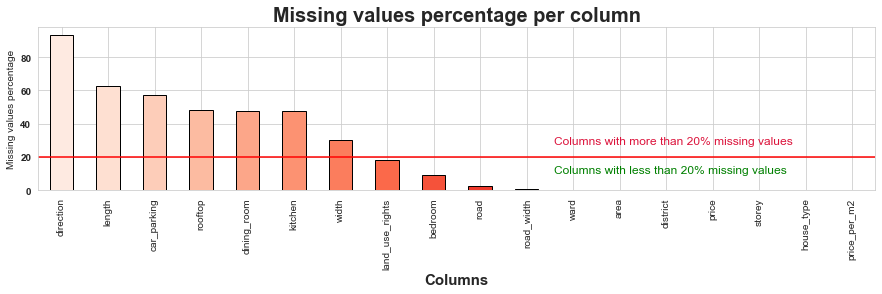

In [17]:
def msv_1(data, thresh = 20, color = 'black', edgecolor = 'black', height = 3, width = 15):
    
    plt.figure(figsize = (width, height))
    percentage = (data.isnull().mean()) * 100
    percentage.sort_values(ascending = False).plot.bar(color = color, edgecolor = edgecolor)
    plt.axhline(y = thresh, color = 'r', linestyle = '-')
    
    plt.title('Missing values percentage per column', fontsize=20, weight='bold' )
    
    plt.text(len(data.isnull().sum()/len(data))/1.7, thresh+12.5, f'Columns with more than {thresh}% missing values', fontsize=12, color='crimson',
         ha='left' ,va='top')
    plt.text(len(data.isnull().sum()/len(data))/1.7, thresh - 5, f'Columns with less than {thresh}% missing values', fontsize=12, color='green',
         ha='left' ,va='top')
    plt.xlabel('Columns', size=15, weight='bold')
    plt.ylabel('Missing values percentage')
    plt.yticks(weight ='bold')
    
    return plt.show()

msv_1(train, 20, color=sns.color_palette('Reds',15))


We drop all row with missing values in at least three columns in list direction,length,car_parking,rooftop,dining_room,kitchen,width

In [18]:
#drop all row with missing values in at least three columns in list ['direction','length','car_parking','rooftop','dining_room','kitchen','width']
columns_to_check = ['direction', 'length', 'car_parking', 'rooftop', 'dining_room', 'kitchen', 'width']
threshold = len(columns_to_check) - 3  # Set the threshold for missing values

df_cleaned = data.dropna(subset=columns_to_check, thresh=threshold)
len(df_cleaned)


45190

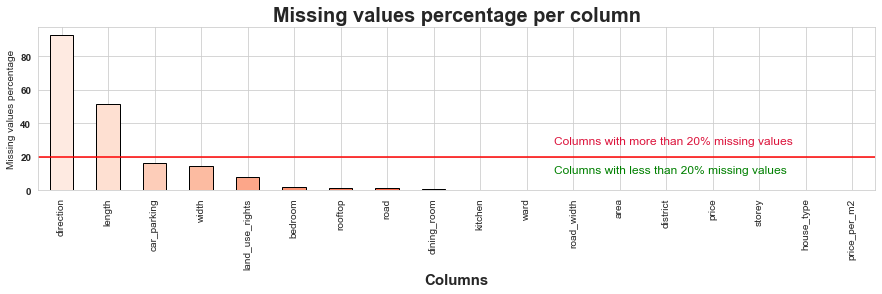

In [19]:
msv_1(df_cleaned, 20, color=sns.color_palette('Reds',15))


In [20]:
df_cleaned['storey'].replace('---', np.nan, inplace=True)

In [21]:
df_cleaned['storey'] = df_cleaned['storey'].astype(float)

In [22]:
def fill_length(df):
    df['length'].fillna(df['area']/df['width'], inplace=True)
    return df
def fill_width(df):
    df['width'].fillna(df['area']/df['length'], inplace=True)
    return df

df_cleaned = fill_length(df_cleaned)
df_cleaned = fill_width(df_cleaned)

In [23]:
category_var = data.select_dtypes(include = 'object')
num_var = data.select_dtypes(exclude = 'object')

print("Number of categorical features are: ", category_var.shape[1])
print("Number of numerical features are: ", num_var.shape[1])


Number of categorical features are:  11
Number of numerical features are:  7


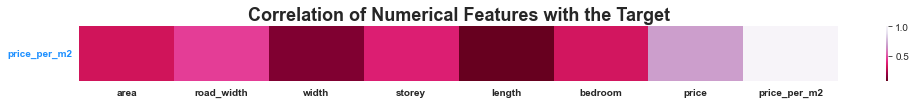

In [24]:
num = df_cleaned.select_dtypes(exclude = 'object')
corr_num = num.corr()

f, ax = plt.subplots(figsize = (17, 1))

sns.heatmap(corr_num.sort_values(by = ['price_per_m2'], ascending = False).head(1), cmap='PuRd_r')

plt.title('Correlation of Numerical Features with the Target', weight = 'bold', fontsize = 18)
plt.xticks(weight='bold')
plt.yticks(weight='bold', color='dodgerblue', rotation=0)

plt.show()


In [89]:
correlation = df_cleaned.corr()['price_per_m2'].sort_values(ascending = False).to_frame().head(10)

cmap = sns.light_palette("cyan", as_cmap = True)

s = correlation.style.background_gradient(cmap = cmap)

s

,price_per_m2
price_per_m2,1.000000
price,0.829970
road_width,0.505266
storey,0.283730
area,0.237320
bedroom,0.236672
width,0.214292
length,0.156310
X,0.023552
Y,-0.001195


In [26]:
df_cleaned.drop(df_cleaned[df_cleaned['storey']>90].index, inplace=True)
df_cleaned.reset_index(drop=True, inplace=True)

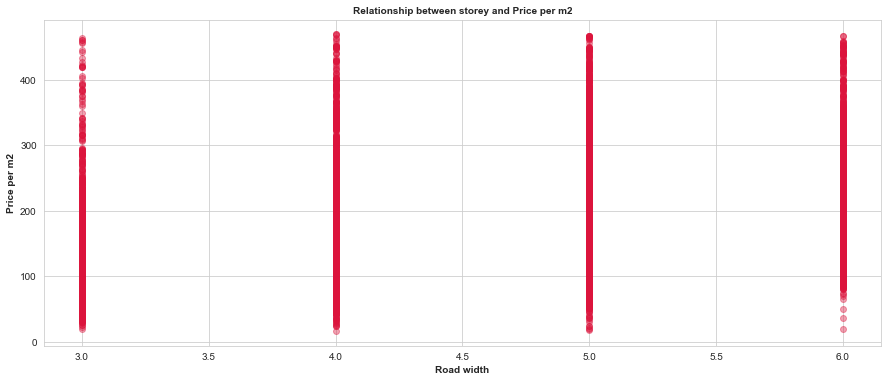

In [88]:
plt.figure(figsize = ((15, 6)))
plt.scatter(x = 'storey', y = 'price_per_m2', data = df_cleaned, color='crimson', alpha=0.4)
plt.title('Relationship between storey and Price per m2', weight = 'bold', fontsize = 10)
plt.xlabel('Road width', weight = 'bold')
plt.ylabel('Price per m2', weight = 'bold')
plt.show()


<AxesSubplot:xlabel='road_width', ylabel='price_per_m2'>

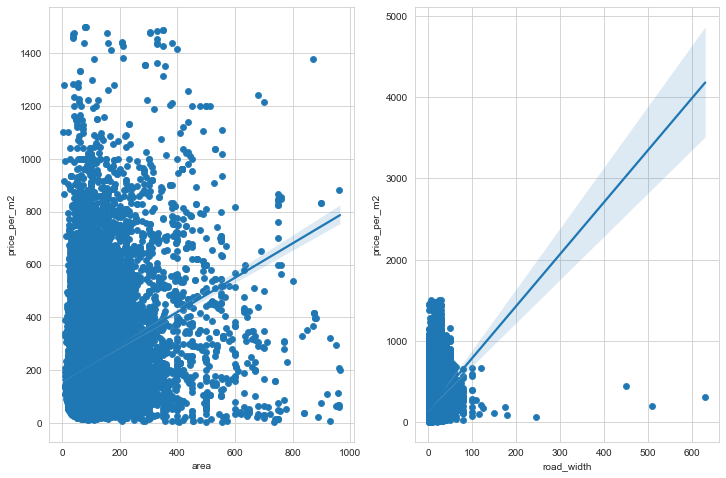

In [28]:
## Scatter plotting for SalePrice and GrLivArea.
fig, (ax1, ax2) = plt.subplots(figsize = (12, 8), ncols = 2,sharey = False)
 
sns.scatterplot(x = df_cleaned['area'], y = df_cleaned['price_per_m2'],  ax = ax1)
## Putting a regression line. 
sns.regplot(x = df_cleaned['area'], y = df_cleaned['price_per_m2'], ax = ax1)

sns.scatterplot(x = df_cleaned['road_width'],y = df_cleaned['price_per_m2'], ax = ax2)
## regression line for MasVnrArea and SalePrice. 
sns.regplot(x = df_cleaned['road_width'], y = df_cleaned['price_per_m2'], ax=ax2)


<AxesSubplot:xlabel='storey', ylabel='price_per_m2'>

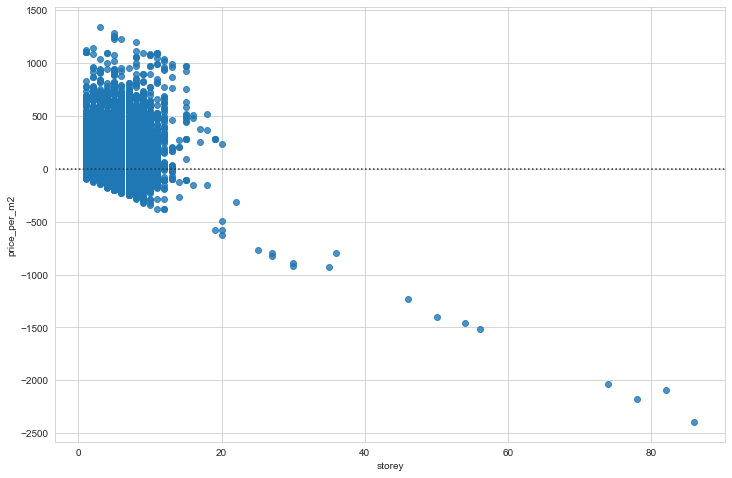

In [29]:
plt.subplots(figsize = (12,8))
sns.residplot(df_cleaned['storey'], df_cleaned['price_per_m2'])


In [30]:
category_var.columns

Index(['direction', 'dining_room', 'kitchen', 'house_type', 'land_use_rights',
       'rooftop', 'storey', 'car_parking', 'road', 'ward', 'district'],
      dtype='object')

<Figure size 1080x720 with 0 Axes>

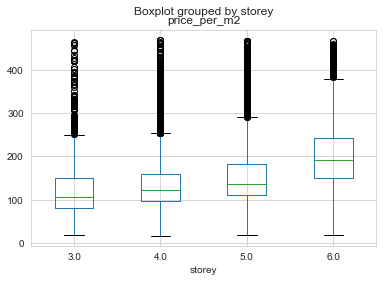

In [87]:
plt.figure(figsize = ((15, 10)))
#plot house price boxplot for storey from 1 to 10, with storey > 10 is 10
df_cleaned[df_cleaned['storey']<=10].boxplot(by = 'storey', column = 'price_per_m2' )

plt.show()


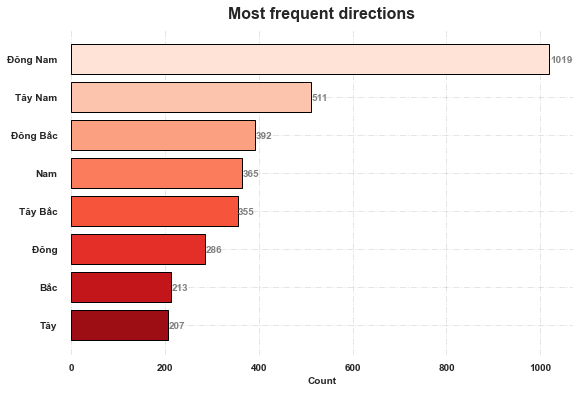

In [32]:
def horizontal_plot(data, column_name, color, plot_title, log=False):
    
    """
    A function that plots a horizontal bar graph for the given column name
    """
    
    fig, ax = plt.subplots(figsize = (9, 6))
    
    title_cnt = data[column_name].value_counts().sort_values(ascending = False).reset_index()
    if log == True:
        title_cnt.iloc[:, 1] = np.log(title_cnt.iloc[:, 1])
    mn = ax.barh(title_cnt.iloc[:, 0], title_cnt.iloc[:, 1], edgecolor = 'black', color =
                sns.color_palette(color, len(title_cnt)))

    for s in ['top','bottom','left','right']:
        ax.spines[s].set_visible(False)

    # Remove x,y Ticks
    ax.xaxis.set_ticks_position('none')
    ax.yaxis.set_ticks_position('none')

    # Add padding between axes and labels
    ax.xaxis.set_tick_params(pad=5)
    ax.yaxis.set_tick_params(pad=10)

    # Add x,y gridlines
    ax.grid(b=True, color='grey', linestyle='-.', linewidth=1, alpha=0.2)

    # Show top values 
    ax.invert_yaxis()

    ax.set_title(plot_title,weight='bold',loc='center', pad=10, fontsize=16)
    
    ax.set_xlabel('Count', weight='bold')

    for i in ax.patches:
        ax.text(i.get_width() + 1.0, i.get_y() + 0.5, str(round((i.get_width()), 2)),
                fontsize=10, fontweight='bold', color='grey')

    plt.yticks(weight='bold')
    plt.xticks(weight='bold')

    plt.show()
horizontal_plot(df_cleaned, 'direction', 'Reds', 'Most frequent directions')


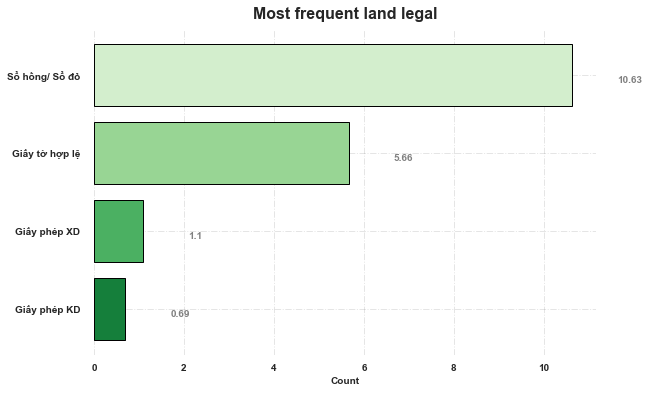

In [33]:
horizontal_plot(df_cleaned, 'land_use_rights', 'Greens', 'Most frequent land legal', log = True)


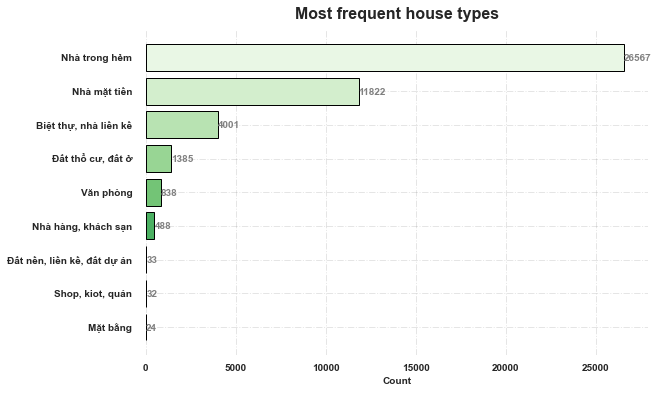

In [34]:
horizontal_plot(df_cleaned, 'house_type', 'Greens', 'Most frequent house types', log = False)


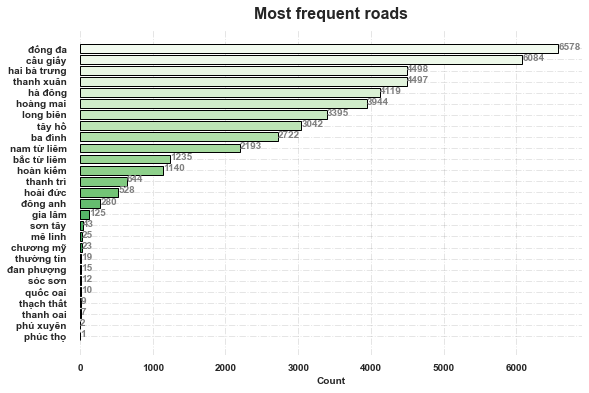

In [35]:
horizontal_plot(df_cleaned, 'district', 'Greens', 'Most frequent roads', log = False)


In [36]:
df_cleaned['district'].value_counts().sort_values(ascending = False)

đống đa         6578
cầu giấy        6084
hai bà trưng    4498
thanh xuân      4497
hà đông         4119
hoàng mai       3944
long biên       3395
tây hồ          3042
ba đình         2722
nam từ liêm     2193
bắc từ liêm     1235
hoàn kiếm       1140
thanh trì        644
hoài đức         528
đông anh         280
gia lâm          125
sơn tây           43
mê linh           25
chương mỹ         23
thường tín        19
đan phượng        15
sóc sơn           12
quốc oai          10
thạch thất         9
thanh oai          7
phú xuyên          2
phúc thọ           1
Name: district, dtype: int64

In [37]:
df_cleaned.head()

,area,direction,dining_room,road_width,kitchen,house_type,land_use_rights,rooftop,width,storey,car_parking,length,bedroom,road,ward,district,price,price_per_m2
0,54.0,NaN,True,6.0,True,Nhà trong hẻm,Sổ hồng/ Sổ đỏ,True,4.8,6.0,True,11.250000,4.0,trần đại nghĩa,bách khoa,hai bà trưng,14.6,270.370370
1,90.0,NaN,True,7.0,True,Nhà trong hẻm,Sổ hồng/ Sổ đỏ,True,5.0,4.0,True,18.000000,4.0,kim đồng,giáp bát,hoàng mai,17.8,197.777778
2,33.0,Đông Nam,True,3.0,True,Nhà trong hẻm,Sổ hồng/ Sổ đỏ,True,5.0,4.0,NaN,6.500000,3.0,yên xá,văn quán,hà đông,2.8,84.848485
3,70.0,Nam,True,3.0,True,Nhà trong hẻm,Sổ hồng/ Sổ đỏ,True,9.0,4.0,True,10.000000,4.0,đặng tất,quán thánh,ba đình,16.0,228.571429
4,60.0,NaN,True,6.0,True,Nhà trong hẻm,Sổ hồng/ Sổ đỏ,True,4.5,6.0,True,13.333333,4.0,nguyên hồng,láng hạ,đống đa,10.6,176.666667


In [38]:
from geopy.geocoders import Nominatim
import time
from tqdm import tqdm


In [67]:
def get_loc(x, lat=True):
    x = str(x)
    x_clean = x.replace(","," ")
    try:
        x_clean.replace("None", "")
        loc = Nominatim(user_agent="GetLoc")
        getLoc = loc.geocode(x_clean)
        return (  getLoc.latitude, getLoc.longitude)
    except:
        try:
            x = ','.join(x.split(',')[1:])
            x_clean = x.replace(","," ")
            x_clean.replace("None", "")
            loc = Nominatim(user_agent="GetLoc")
            getLoc = loc.geocode(x_clean)
            return (  getLoc.latitude, getLoc.longitude)
        except:
            try: 
                x = ','.join(x.split(',')[1:])
                x_clean = x.replace(","," ")
                x_clean.replace("None", "")
                loc = Nominatim(user_agent="GetLoc")
                getLoc = loc.geocode(x_clean)
                return (  getLoc.latitude, getLoc.longitude)
            except:
                loc = Nominatim(user_agent="GetLoc")
                getLoc = loc.geocode("Hà Nội")
                return (  getLoc.latitude, getLoc.longitude)


In [63]:
address = [1 for i in range(len(df_cleaned))]
for i in range(len(df_cleaned)):
    address[i] = str(df_cleaned["road"][i]) + "," + str(df_cleaned["ward"][i]) +"," + str(df_cleaned["district"][i])+ " hà nội"
    if str(address[i]) == 'nan':
        address[i] = str(df_cleaned["ward"][i]) +"," + str(df_cleaned["district"][i])+ " hà nội"
        if str(address[i]) == 'nan':
            address[i] = str(df_cleaned["district"][i])+ " hà nội"
            if str(address[i]) == 'nan':
                address[i] = "hà nội"   

In [41]:
import pickle
import os


In [71]:
with open("geopy_loc/total_dict.pickle", "rb") as f:
    total_dict = pickle.load(f)


In [68]:
df_cleaned['X'] = 0
df_cleaned['Y'] = 0
for i in tqdm(range(len(df_cleaned))):
    if address[i] in total_dict.keys():
        df_cleaned['X'][i] = total_dict[address[i]][0]
        df_cleaned['Y'][i] = total_dict[address[i]][1] 
    else:
        try:
            df_cleaned['X'][i], df_cleaned['Y'][i]= get_loc(address[i])
            total_dict[address[i]] = [df_cleaned['X'][i], df_cleaned['Y'][i]]
        except:
            df_cleaned['X'][i], df_cleaned['Y'][i]= get_loc('Hà Nội')
            total_dict['Hà Nội'] = [df_cleaned['X'][i], df_cleaned['Y'][i]]


  0%|          | 0/45190 [00:00<?, ?it/s]

100%|██████████| 45190/45190 [50:09<00:00, 15.01it/s]  


In [76]:
df_cleaned.to_csv('alonhadat-CLEAN3.csv', index=False)

In [192]:
df_cleaned = pd.read_csv('alonhadat-CLEAN3.csv', encoding='utf-8')

<AxesSubplot:>

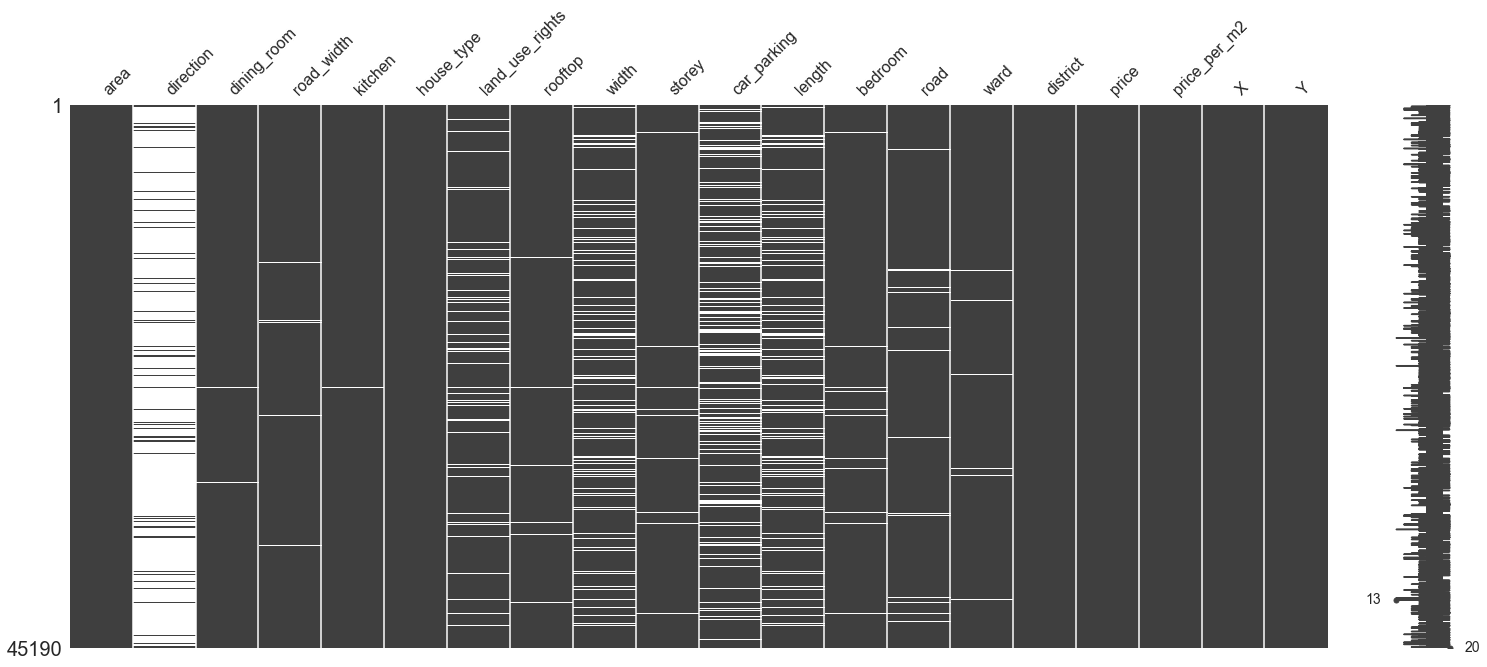

In [193]:
import missingno as msno
%matplotlib inline
msno.matrix(df_cleaned)

In [194]:
df_cleaned['direction']= df_cleaned['direction'].astype(str)
df_cleaned['house_type']= df_cleaned['house_type'].astype(str)
df_cleaned['land_use_rights']= df_cleaned['land_use_rights'].astype(str)


In [195]:
train, test = train_test_split(df_cleaned, test_size=0.2, random_state=42)

In [196]:
#Handle missing values for numerical columns
train['storey'].fillna(train['storey'].median(), inplace=True)
train['length'].fillna(train['length'].median(), inplace=True)
train['width'].fillna(train['width'].median(), inplace=True)
train['area'].fillna(train['area'].median(), inplace=True)
train['bedroom'].fillna(train['bedroom'].median(), inplace=True)
train['road_width'].fillna(train['road_width'].median(), inplace=True)

test['storey'].fillna(train['storey'].median(), inplace=True)
test['length'].fillna(train['length'].median(), inplace=True)
test['width'].fillna(train['width'].median(), inplace=True)
test['area'].fillna(train['area'].median(), inplace=True)
test['bedroom'].fillna(train['bedroom'].median(), inplace=True)
test['road_width'].fillna(train['road_width'].median(), inplace=True)


In [197]:
#Handle missing values for categorical columns
train['direction'].fillna('None', inplace=True)
train['dining_room'].fillna(train['dining_room'].mode()[0], inplace=True)
train['kitchen'].fillna(train['kitchen'].mode()[0], inplace=True)
train['car_parking'].fillna(train['car_parking'].mode()[0], inplace=True)
train['land_use_rights'].fillna(train['land_use_rights'].mode()[0], inplace=True)
train['rooftop'].fillna(train['rooftop'].mode()[0], inplace=True)

test['direction'].fillna('None', inplace=True)
test['dining_room'].fillna(train['dining_room'].mode()[0], inplace=True)
test['kitchen'].fillna(train['kitchen'].mode()[0], inplace=True)
test['car_parking'].fillna(train['car_parking'].mode()[0], inplace=True)
test['land_use_rights'].fillna(train['land_use_rights'].mode()[0], inplace=True)
test['rooftop'].fillna(train['rooftop'].mode()[0], inplace=True)


In [198]:
#Handle outliers that exceed Q3 + 1.5*IQR and Q1 - 1.5*IQR
def handle_outliers(df, column_name):
    Q1 = df[column_name].quantile(0.25)
    Q3 = df[column_name].quantile(0.75)
    IQR = Q3 - Q1
    df.drop(df[df[column_name] > (Q3 + 1.5*IQR)].index, inplace=True)
    df.drop(df[df[column_name] < (Q1 - 1.5*IQR)].index, inplace=True)
    return df

In [199]:
train = handle_outliers(train, 'area')
train = handle_outliers(train, 'storey')
train = handle_outliers(train, 'road_width')
train = handle_outliers(train, 'length')
train = handle_outliers(train, 'width')
train = handle_outliers(train, 'bedroom')
train = handle_outliers(train, 'price_per_m2')


In [200]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler, MinMaxScaler, RobustScaler
from sklearn.model_selection import train_test_split


In [201]:
scaler = RobustScaler()
scale_feat = ['area', 'length', 'width', 'road_width']
train[scale_feat] = scaler.fit_transform(train[scale_feat])
test[scale_feat] = scaler.transform(test[scale_feat])

In [202]:
scaler = MinMaxScaler()
scale_feat = ['X', 'Y']
train[scale_feat] = scaler.fit_transform(train[scale_feat])
test[scale_feat] = scaler.transform(test[scale_feat])

In [203]:
#encode categorical features by one hot encoding
train = pd.get_dummies(train, columns=['direction', 'house_type', 'land_use_rights'])
test = pd.get_dummies(test, columns=['direction', 'house_type', 'land_use_rights'])


In [204]:
test['land_use_rights_Giấy phép KD'] = 0

In [205]:
not_features = ['price', 'road', 'ward', 'district','price_per_m2']
features = [col for col in train.columns if col not in not_features]

In [206]:
from xgboost import XGBRegressor
xgb = XGBRegressor(n_estimators = 300, max_depth=20, eta=0.01, gamma=1, tree_method="gpu_hist",subsample=1, objective="reg:squarederror", enable_categorical=True, random_state=0)


In [207]:
xgb.fit(train[features], train['price_per_m2']) 

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=True, eta=0.01,
             eval_metric=None, gamma=1, gpu_id=0, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.00999999978, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=20, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=300, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0, ...)

In [208]:
from sklearn.metrics import mean_absolute_percentage_error as mape,r2_score

pred = xgb.predict(test[features],ntree_limit=xgb.best_ntree_limit)
print(mape(test['price_per_m2'], pred)) #Lower the better


0.2604868889277362
